In [6]:
import hdbscan
import umap
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.decomposition import PCA

In [7]:
#Load data
labels = np.load('Simulations\labels_test.npy')
dataset =  np.load('Simulations\y_test.npy')

In [8]:
#Functions
#Apply PCA on a given dataset

def reduce(dataset,n_components):
    pca = PCA(n_components=n_components,
              copy=True,
              whiten=False,
              svd_solver='auto',
              tol=0.0, iterated_power='auto',
              random_state=50)
    pca = pca.fit_transform(dataset)
      
    return pca

#Perfom HDBSCAN clustering and calculate the similarity index
def Similarity_index(reduced_data,labels):
    
    
    hd = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=False, leaf_size=40,
    metric='minkowski', min_cluster_size=50, min_samples=30, p=1)
    
    hd.fit(reduced_data)
    similarity = metrics.rand_score(hd.labels_,labels)
    
    return similarity


    

In [4]:
#Calculate the Similarity indices over pricipal components and create an array
indeces = []
for dimension in range(1,60):
    index = Similarity_index(reduce(dataset,dimension),labels)
    print(index,dimension)
    indeces.append(index)

0.577362535250705 1
0.5082697773955479 2
0.8408127802556051 3
...
0.5004920762415248 57
0.4968323070461409 58
0.5085022556451129 59


In [13]:
a = range(1,100)

simindex = "simin.plk"
with open(simindex, 'rb') as file:
    indecec = pickle.load(file)
simindex = "simin2.plk"
with open(simindex, 'rb') as file:
    indeces = pickle.load(file)
    
    

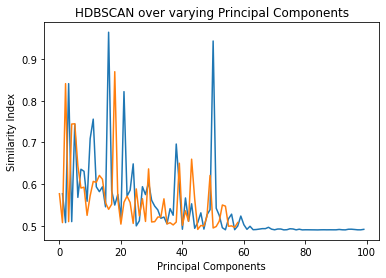

0.8693885277705554


In [15]:
#Plotting the results
plt.plot(a,indecec)
plt.plot(indeces)
plt.title("HDBSCAN over varying Principal Components")
plt.ylabel('Similarity Index')
plt.xlabel('Principal Components')
plt.show()
print(np.array(indeces).max())